In [2]:
import vk
from credentials import *
import re
import pandas as pd
from pymystem3 import Mystem
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.collocations import *
import warnings
from nltk.tokenize import word_tokenize
warnings.simplefilter(action='ignore', category=FutureWarning)

Позволю себе не показывать пароль и логин.

In [7]:
id_app = '6374721'
login = 'login@gmail.com'
password = 'passwrd'

In [8]:
session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)

<b>Задача 1. Формирование корпуса текстов (10 баллов)</b>

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной.

С помощью wall.get скачайте посты данных групп и сформируйте корпуса текстов, используя возможности pandas.

In [9]:
corpus1 = vk_api.wall.get(domain = 'humanitates', v = 4.9, count = 100)
corpus2 = vk_api.wall.get(domain = 'inkerinmaa', v = 4.9, count = 100)

In [10]:
humdf = pd.DataFrame(data = corpus1, columns = ['Texts'])
inkdf = pd.DataFrame(data = corpus2, columns = ['Texts'])
df = pd.concat([humdf, inkdf]).reset_index()

Пример датафрейма:

In [12]:
df[:10]

,index,Texts
0,0,276
1,1,"{'attachments': [{'type': 'photo', 'photo': {'..."
2,2,"{'attachments': [{'type': 'photo', 'photo': {'..."
3,3,"{'attachments': [{'type': 'photo', 'photo': {'..."
4,4,"{'attachments': [{'type': 'video', 'video': {'..."
5,5,"{'attachments': [{'type': 'photo', 'photo': {'..."
6,6,"{'attachments': [{'type': 'photo', 'photo': {'..."
7,7,"{'attachments': [{'type': 'photo', 'photo': {'..."
8,8,"{'attachments': [{'type': 'photo', 'photo': {'..."
9,9,"{'attachments': [{'type': 'photo', 'photo': {'..."


<b>Задача 2. Предобработка (15 баллов)</b>

Предобработайте корпуса текстов:

Очистите тексты от мусора, используя регулярные выражения. Лемматизируйте текст. Удалите стоп-слова. Список стоп-слов можно получить с помощью модуля stop-words.

In [13]:
stopwords = nltk.corpus.stopwords.words('russian')
#некоторые статьи заканчиваются словом "подробнее" и ссылкой за ней, поэтому я решил добавить его к стоп-словам;
#+отдельные буквы, чтобы избавиться от инициалов (дж - от Джузеппе Верди). Т.к. корпус был небольшой, я просмотрел его весь;
#в другой ситуации, наверное, было бы разумнее добавить все отдельные буквы в стоп-лист.
stopwords2 = ['подробнее', 'гг', 'д', 'н', 'ф', 'т', 'р', 'е', 'п', 'дж', 'х', 'ст', 'ч', 'пн', 'вт', 'ср', 'чт', 'õõ', 'г', 'â', 'å', 'õ', 'ä', 'ö', 'õ', 'è']
stopwords += stopwords2
m = Mystem()

Почистим сразу весь корпус (кроме первого элемента, где находится информация, не содержащая пост со стены) и создадим список данных для финального корпуса:

In [14]:
lst = []
for tryingtoclean in df['Texts'][1:]:
    tryingtoclean = str(tryingtoclean)
    tryingtoclean = tryingtoclean.lower()
    tryingtoclean = re.sub('^\w\s', '', tryingtoclean)
    tryingtoclean = re.sub(r'[a-zA-Z]', '', tryingtoclean)
    tryingtoclean = re.sub(r'_', '', tryingtoclean)
    tryingtoclean = re.sub(r'\d', '', tryingtoclean)
    words = re.findall(r'\w+', tryingtoclean)
    clean = filter(lambda a: a not in stopwords, words)
    jj=m.lemmatize(' '.join(clean))
    x = ''.join(jj).rstrip()
    lst.append(x)

In [15]:
final_corpus = pd.DataFrame(data = lst, columns = ['Texts'])

Пример очищенного:

In [16]:
final_corpus[125:135]

,Texts
125,декабрь день год назад большевик признавать не...
126,псой короленко папа застреливать хорек псой ко...
127,михаил башак ингерманландия электропартизан ми...
128,бортнянский коль славный наш господь сион борт...
129,друг публиковать большой спецпроект ингерманла...
130,сергей боярский михаил боярский динозаврик сер...
131,эксперт взрыв петербург весь вероятность терак...
132,тэппо рэпо википедия год ждать русский википед...
133,екатерина александрова ääö екатерина александр...
134,василий богатырев алина кукушкин песня конек в...


<b>Задача 3. Выделение признаков (5 баллов)</b>  

Воспользуйтесь TfidfVectorizer для векторизации текстов. Для каждой группы получите список топ-токенов и выведите.

Честно признаюсь, что для решения части этой задачи я воспользовался этим источником: https://gist.github.com/StevenMaude/ea46edc315b0f94d03b9

In [17]:
#Определяем топ-20 по первым 100 строкам - т.е. по корпусу текстов из "Гуманитариев"
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(final_corpus['Texts'][:101])
features = vectorizer.get_feature_names()
scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_vectors.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
for item in sorted_scores[:20]:
    print ("{0:50} Значение: {1}".format(item[0], item[1]))


год                                                Значение: 3.736486733141061
который                                            Значение: 1.885617160439465
москва                                             Значение: 1.799315958058702
это                                                Значение: 1.6749350785039878
сегодня                                            Значение: 1.6281097404811185
умирать                                            Значение: 1.6223167402694625
владимир                                           Значение: 1.5872162550355888
литература                                         Значение: 1.4141881758712123
леонид                                             Значение: 1.3723364465016048
российский                                         Значение: 1.3446171966678135
книга                                              Значение: 1.3375176110969627
назад                                              Значение: 1.3260898268501042
первый                                     

In [18]:
#Определяем топ-20 по последним 100 строкам - т.е. по корпусу текстов из "Ингерманландии"
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(final_corpus['Texts'][101:])
features = vectorizer.get_feature_names()
scores = zip(vectorizer.get_feature_names(), np.asarray(tfidf_vectors.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
for item in sorted_scores[:20]:
    print ("{0:50} Значение: {1}".format(item[0], item[1]))


петербург                                          Значение: 3.775089240324036
год                                                Значение: 3.5206029587478964
ингерманландия                                     Значение: 3.4434407466373607
ингрия                                             Значение: 2.678537194791471
ингерманландский                                   Значение: 2.2493126340268437
это                                                Значение: 2.194069704054931
который                                            Значение: 2.0565180326434147
история                                            Значение: 1.979934939978696
финляндия                                          Значение: 1.945359498958294
наш                                                Значение: 1.8790670831078478
свой                                               Значение: 1.8580733170277155
день                                               Значение: 1.81095862212081
город                                          

<b>Задача 4. Визуализация (5 баллов)</b>  

Визуализируйте токены для каждого сообщества с помощью WORDCLOUD.

Для части "Гуманитариев":

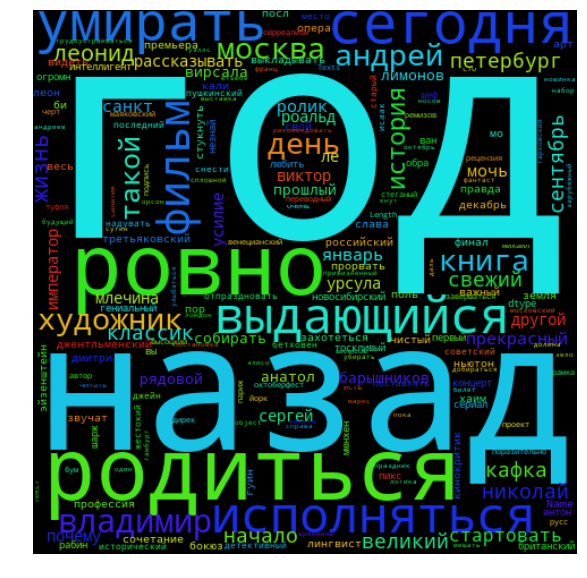

In [43]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(final_corpus['Texts'][:101]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

Для части "Ингерманландии":

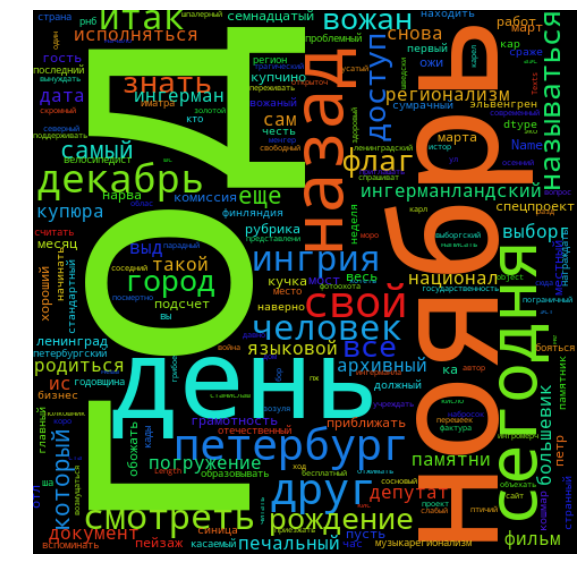

In [42]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(str(final_corpus['Texts'][101:]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

<b>Задача 5. Поиск коллокаций (15 баллов)</b>

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI.

При выполнении этого задания я опирался на этот материал: https://stackoverflow.com/questions/21128689/how-to-get-pmi-scores-for-trigrams-with-nltk-collocations-python

К сожалению, я делал на чужом ноутбуке, который мне дали на одну ночь, чтобы я смог сделать (свой сломался), и вынужден закончить чуть раньше, чем я успел доделать это задание. Кажется, что он выдает здесь по алфавиту, но это не совсем так - если прокрутить ниже, к наименее частотным, то там видно, что там коллокации уже идут вразнобой; к сожалению, проверить, насколько правильно тут всё считается я уже не успеваю.

Для части "Гуманитариев":

In [62]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(word_tokenize(' '.join(final_corpus['Texts'][:101])))
for i in bigram_finder.score_ngrams(bigram_measures.pmi):
    print (i)

(('абитуриент', 'грибоедов'), 12.469641817239516)
(('автомат', 'калашников'), 12.469641817239516)
(('адам', 'бид'), 12.469641817239516)
(('адрес', 'ул'), 12.469641817239516)
(('айседора', 'дункан'), 12.469641817239516)
(('академия', 'художество'), 12.469641817239516)
(('аккуратный', 'провинция'), 12.469641817239516)
(('альфред', 'шнитке'), 12.469641817239516)
(('амбиция', 'всеохватность'), 12.469641817239516)
(('англичанин', 'поскольку'), 12.469641817239516)
(('англичанка', 'гадить'), 12.469641817239516)
(('анненский', 'муза'), 12.469641817239516)
(('антрополог', 'светлый'), 12.469641817239516)
(('апартеид', 'юар'), 12.469641817239516)
(('ар', 'карапетян'), 12.469641817239516)
(('арпеджио', 'гармония'), 12.469641817239516)
(('арт', 'феминизм'), 12.469641817239516)
(('архив', 'рукопись'), 12.469641817239516)
(('архитектурный', 'чертеж'), 12.469641817239516)
(('ахмадулина', 'микеланджело'), 12.469641817239516)
(('балетоман', 'рудольф'), 12.469641817239516)
(('баллада', 'любовь'), 12.4696

(('слушать', 'орфей'), 12.469641817239516)
(('смешной', 'короткометражка'), 12.469641817239516)
(('снос', 'перестраивать'), 12.469641817239516)
(('собинова', 'кассиливать'), 12.469641817239516)
(('согласно', 'легенда'), 12.469641817239516)
(('сорт', 'пиво'), 12.469641817239516)
(('состоятельный', 'паломник'), 12.469641817239516)
(('состоять', 'следующий'), 12.469641817239516)
(('сохранять', 'принцип'), 12.469641817239516)
(('сохраняться', 'архив'), 12.469641817239516)
(('сочувствовать', 'храбрый'), 12.469641817239516)
(('союзник', 'отличие'), 12.469641817239516)
(('специальный', 'жюри'), 12.469641817239516)
(('сплошной', 'усилие'), 12.469641817239516)
(('спойлер', 'легендарный'), 12.469641817239516)
(('справа', 'пляж'), 12.469641817239516)
(('справочный', 'заметка'), 12.469641817239516)
(('спрашивать', 'испания'), 12.469641817239516)
(('спровоцировать', 'предреволюционный'), 12.469641817239516)
(('средство', 'состоятельный'), 12.469641817239516)
(('старославянский', 'сленг'), 12.469641

(('цель', 'заменять'), 10.469641817239516)
(('цензура', 'вносить'), 10.469641817239516)
(('цензура', 'сам'), 10.469641817239516)
(('циклопичный', 'форма'), 10.469641817239516)
(('чарующий', 'сцена'), 10.469641817239516)
(('читатель', 'капитан'), 10.469641817239516)
(('чудо', 'подобный'), 10.469641817239516)
(('шварц', 'дракон'), 10.469641817239516)
(('экономический', 'политический'), 10.469641817239516)
(('экран', 'ровно'), 10.469641817239516)
(('эпизод', 'сцена'), 10.469641817239516)
(('эсхатофония', 'дирижировать'), 10.469641817239516)
(('ээсхатофония', 'дирижировать'), 10.469641817239516)
(('янкилевский', 'ровно'), 10.469641817239516)
(('дарнтон', 'цензор'), 10.299716815797204)
(('игорь', 'вулох'), 10.299716815797204)
(('новосибирский', 'оперный'), 10.299716815797204)
(('переживание', 'передавать'), 10.299716815797204)
(('пушкинский', 'праздник'), 10.299716815797204)
(('солженицын', 'платонов'), 10.299716815797204)
(('чувство', 'переживание'), 10.299716815797204)
(('шолохов', 'пасте

(('мир', 'полуграмотный'), 8.562751221630997)
(('мир', 'поражать'), 8.562751221630997)
(('мир', 'припадочный'), 8.562751221630997)
(('мир', 'сияние'), 8.562751221630997)
(('невероятный', 'открытие'), 8.562751221630997)
(('немецкий', 'земля'), 8.562751221630997)
(('нравиться', 'исигуро'), 8.562751221630997)
(('общество', 'классический'), 8.562751221630997)
(('основа', 'классический'), 8.562751221630997)
(('основатель', 'немецкий'), 8.562751221630997)
(('остальное', 'мир'), 8.562751221630997)
(('писательский', 'мир'), 8.562751221630997)
(('платонов', 'работать'), 8.562751221630997)
(('попытка', 'разбираться'), 8.562751221630997)
(('пора', 'издаваться'), 8.562751221630997)
(('поставлять', 'ваш'), 8.562751221630997)
(('постановка', 'свежий'), 8.562751221630997)
(('приходить', 'интересно'), 8.562751221630997)
(('происхождение', 'мир'), 8.562751221630997)
(('проходить', 'центр'), 8.562751221630997)
(('реймс', 'путешествие'), 8.562751221630997)
(('российский', 'абстрактный'), 8.56275122163099

(('многий', 'фильм'), 6.1842395983772676)
(('многий', 'человек'), 6.1842395983772676)
(('мочь', 'идти'), 6.1842395983772676)
(('фильм', 'андрей'), 6.1842395983772676)
(('хороший', 'театр'), 6.1842395983772676)
(('черный', 'книга'), 6.1842395983772676)
(('тот', 'самый'), 6.180545114819527)
(('виолончель', 'оркестр'), 6.1477137223521545)
(('время', 'прочитывать'), 6.1477137223521545)
(('два', 'роман'), 6.1477137223521545)
(('знаменитый', 'роман'), 6.1477137223521545)
(('концерт', 'весь'), 6.1477137223521545)
(('концерт', 'виолончель'), 6.1477137223521545)
(('опера', 'роман'), 6.1477137223521545)
(('оркестр', 'николай'), 6.1477137223521545)
(('первый', 'взять'), 6.1477137223521545)
(('первый', 'два'), 6.1477137223521545)
(('умирать', 'дмитрий'), 6.1477137223521545)
(('кортасар', 'очень'), 6.138724939124899)
(('советский', 'литература'), 6.129791814354892)
(('жизнь', 'кортасар'), 6.0773243944607565)
(('линев', 'знать'), 6.0773243944607565)
(('новый', 'интересный'), 6.0773243944607565)
(('п

Для части "Ингерманландии":

In [64]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(' '.join(final_corpus['Texts'][101:])))
for i in finder.score_ngrams(bigram_measures.pmi):
    print (i)

(('авторский', 'фоторабота'), 13.412966718580916)
(('агитационный', 'листовка'), 13.412966718580916)
(('адепт', 'стариков'), 13.412966718580916)
(('администраторка', 'сбивчивый'), 13.412966718580916)
(('адрес', 'предстоятель'), 13.412966718580916)
(('айдер', 'муждабаева'), 13.412966718580916)
(('академический', 'сообщество'), 13.412966718580916)
(('актуальный', 'шарж'), 13.412966718580916)
(('акула', 'клавиатура'), 13.412966718580916)
(('аларчин', 'харламов'), 13.412966718580916)
(('альберт', 'петтинен'), 13.412966718580916)
(('американец', 'равный'), 13.412966718580916)
(('анамнез', 'экс'), 13.412966718580916)
(('ангажировать', 'академический'), 13.412966718580916)
(('англия', 'футбол'), 13.412966718580916)
(('антипод', 'спешить'), 13.412966718580916)
(('аптекарь', 'яскеляйнен'), 13.412966718580916)
(('арри', 'кугаппи'), 13.412966718580916)
(('археолог', 'антрополог'), 13.412966718580916)
(('археология', 'фольклористика'), 13.412966718580916)
(('архивыспб', 'генеалогия'), 13.412966718

(('принципиальный', 'руководитель'), 13.412966718580916)
(('припоминать', 'пораженческий'), 13.412966718580916)
(('приправлять', 'возглас'), 13.412966718580916)
(('природный', 'ландшафт'), 13.412966718580916)
(('присваивать', 'матвиенко'), 13.412966718580916)
(('присвоение', 'почетный'), 13.412966718580916)
(('притяжение', 'рай'), 13.412966718580916)
(('причал', 'черт'), 13.412966718580916)
(('причинять', 'препятствие'), 13.412966718580916)
(('продажный', 'эмигрант'), 13.412966718580916)
(('продвигаться', 'км'), 13.412966718580916)
(('продолжаться', 'дельта'), 13.412966718580916)
(('продразверстка', 'колхоз'), 13.412966718580916)
(('продрогнуть', 'старик'), 13.412966718580916)
(('продуктивный', 'археология'), 13.412966718580916)
(('производитель', 'рекомендовать'), 13.412966718580916)
(('произвол', 'грабеж'), 13.412966718580916)
(('проклятие', 'предыдущий'), 13.412966718580916)
(('просачиваться', 'этаж'), 13.412966718580916)
(('прослужить', 'старость'), 13.412966718580916)
(('пространс

(('витушкин', 'присоединяться'), 11.412966718580916)
(('витушкин', 'утренний'), 11.412966718580916)
(('владение', 'вероятно'), 11.412966718580916)
(('владение', 'кастельхольм'), 11.412966718580916)
(('внезапно', 'осознавать'), 11.412966718580916)
(('внимание', 'уделять'), 11.412966718580916)
(('вода', 'лимон'), 11.412966718580916)
(('возвращаться', 'пасторский'), 11.412966718580916)
(('возраст', 'диспут'), 11.412966718580916)
(('войско', 'одерживать'), 11.412966718580916)
(('войско', 'юденич'), 11.412966718580916)
(('воспользоваться', 'обращать'), 11.412966718580916)
(('восстанавливать', 'ганзейский'), 11.412966718580916)
(('восстанавливать', 'семейный'), 11.412966718580916)
(('восстанавливать', 'уппсальский'), 11.412966718580916)
(('восходить', 'престол'), 11.412966718580916)
(('вполне', 'обычный'), 11.412966718580916)
(('вхождение', 'новгород'), 11.412966718580916)
(('вчерашний', 'хохма'), 11.412966718580916)
(('вчетверо', 'превосходить'), 11.412966718580916)
(('выстраивать', 'деревя

(('вместе', 'кусок'), 10.605611796523313)
(('вместе', 'уильям'), 10.605611796523313)
(('вожанин', 'друг'), 10.605611796523313)
(('вожаный', 'друг'), 10.605611796523313)
(('волость', 'ää'), 10.605611796523313)
(('второй', 'величина'), 10.605611796523313)
(('второй', 'воскресение'), 10.605611796523313)
(('второй', 'тур'), 10.605611796523313)
(('годовщина', 'битва'), 10.605611796523313)
(('городской', 'дума'), 10.605611796523313)
(('городской', 'сословие'), 10.605611796523313)
(('граница', 'догма'), 10.605611796523313)
(('двое', 'против'), 10.605611796523313)
(('деревушка', 'ää'), 10.605611796523313)
(('дорога', 'былой'), 10.605611796523313)
(('дорога', 'кирка'), 10.605611796523313)
(('дорога', 'причал'), 10.605611796523313)
(('друг', 'вожаный'), 10.605611796523313)
(('друг', 'отдых'), 10.605611796523313)
(('дружить', 'представитель'), 10.605611796523313)
(('еврейский', 'происхождение'), 10.605611796523313)
(('железный', 'дорога'), 10.605611796523313)
(('завершение', 'городской'), 10.6056

(('эко', 'писать'), 9.712527000439824)
(('михаил', 'войтенков'), 9.676001124414707)
(('белый', 'водный'), 9.658079216417448)
(('белый', 'зеленый'), 9.658079216417448)
(('около', 'тысяча'), 9.658079216417448)
(('полный', 'рост'), 9.658079216417448)
(('родиться', 'вырастать'), 9.658079216417448)
(('свыше', 'тысяча'), 9.658079216417448)
(('формирование', 'эстонский'), 9.658079216417448)
(('ää', 'призрак'), 9.605611796523313)
(('атрибут', 'швеция'), 9.605611796523313)
(('африка', 'европеус'), 9.605611796523313)
(('ашурков', 'представитель'), 9.605611796523313)
(('базилик', 'св'), 9.605611796523313)
(('бизнес', 'проект'), 9.605611796523313)
(('блок', 'северный'), 9.605611796523313)
(('бывший', 'сотрудник'), 9.605611796523313)
(('важный', 'оппозиционный'), 9.605611796523313)
(('важный', 'признак'), 9.605611796523313)
(('важный', 'развитие'), 9.605611796523313)
(('васильевна', 'проводить'), 9.605611796523313)
(('включать', 'территория'), 9.605611796523313)
(('влияние', 'ссср'), 9.605611796523

(('недолго', 'ноябрь'), 8.82800421785976)
(('несмотря', 'очевидно'), 8.82800421785976)
(('ниеншанц', 'андерс'), 8.82800421785976)
(('ниеншанц', 'быстро'), 8.82800421785976)
(('новгород', 'московит'), 8.82800421785976)
(('ноябрь', 'внедорожник'), 8.82800421785976)
(('нынешний', 'житель'), 8.82800421785976)
(('обращать', 'московит'), 8.82800421785976)
(('общий', 'пересчитывать'), 8.82800421785976)
(('общий', 'привилегия'), 8.82800421785976)
(('общий', 'стол'), 8.82800421785976)
(('общий', 'трагичный'), 8.82800421785976)
(('общий', 'черта'), 8.82800421785976)
(('однако', 'оканчивать'), 8.82800421785976)
(('ожидать', 'быть'), 8.82800421785976)
(('омнибус', 'представлять'), 8.82800421785976)
(('оппозиционный', 'сила'), 8.82800421785976)
(('отец', 'зинаида'), 8.82800421785976)
(('отечественный', 'регионализм'), 8.82800421785976)
(('очаг', 'ноябрь'), 8.82800421785976)
(('очевидный', 'сила'), 8.82800421785976)
(('пара', 'десяток'), 8.82800421785976)
(('партизан', 'уходить'), 8.82800421785976)


(('исследование', 'народный'), 7.658079216417447)
(('историк', 'экономический'), 7.658079216417447)
(('какой', 'прекрасно'), 7.658079216417447)
(('какой', 'прошлое'), 7.658079216417447)
(('кой', 'какой'), 7.658079216417447)
(('многие', 'понимать'), 7.658079216417447)
(('момент', 'эстонский'), 7.658079216417447)
(('московский', 'губерния'), 7.658079216417447)
(('национальный', 'корень'), 7.658079216417447)
(('одевать', 'декабрь'), 7.658079216417447)
(('однако', 'начинать'), 7.658079216417447)
(('отдавать', 'регион'), 7.658079216417447)
(('переводить', 'какой'), 7.658079216417447)
(('петербуржец', 'депутат'), 7.658079216417447)
(('пока', 'единственный'), 7.658079216417447)
(('пока', 'идти'), 7.658079216417447)
(('пока', 'однако'), 7.658079216417447)
(('полный', 'мера'), 7.658079216417447)
(('полный', 'момент'), 7.658079216417447)
(('получаться', 'галина'), 7.658079216417447)
(('получаться', 'итог'), 7.658079216417447)
(('пользоваться', 'шведский'), 7.658079216417447)
(('понимать', 'очеви

(('трагичный', 'история'), 6.685046264017718)
(('учебник', 'история'), 6.685046264017718)
(('история', 'краеведение'), 6.685046264017717)
(('á', 'сегодня'), 6.658079216417447)
(('белый', 'часть'), 6.658079216417447)
(('губерния', 'должный'), 6.658079216417447)
(('декабрь', 'вильнюс'), 6.658079216417447)
(('другой', 'монарх'), 6.658079216417447)
(('многое', 'другой'), 6.658079216417447)
(('плевицкая', 'декабрь'), 6.658079216417447)
(('сегодня', 'уходить'), 6.658079216417447)
(('сила', 'разный'), 6.658079216417447)
(('сильный', 'регион'), 6.658079216417447)
(('сравнение', 'другой'), 6.658079216417447)
(('считать', 'должный'), 6.658079216417447)
(('такой', 'б'), 6.658079216417447)
(('финн', 'музыка'), 6.658079216417447)
(('часто', 'принимать'), 6.658079216417447)
(('яковлев', 'оно'), 6.658079216417447)
(('яковлев', 'род'), 6.658079216417447)
(('история', 'дата'), 6.634420190947749)
(('активист', 'дмитрий'), 6.6316070050562566)
(('активист', 'хотеть'), 6.6316070050562566)
(('бейдж', 'стано

(('европеус', 'один'), 4.798256874465709)
(('этот', 'она'), 4.798256874465709)
(('апрель', 'год'), 4.79458121632231)
(('версия', 'год'), 4.79458121632231)
(('год', 'блокада'), 4.79458121632231)
(('год', 'вырастать'), 4.79458121632231)
(('год', 'практика'), 4.79458121632231)
(('год', 'спб'), 4.79458121632231)
(('занимать', 'год'), 4.79458121632231)
(('летопись', 'год'), 4.79458121632231)
(('наступать', 'год'), 4.79458121632231)
(('прежний', 'год'), 4.79458121632231)
(('рисунок', 'год'), 4.79458121632231)
(('ингерманландия', 'андерс'), 4.783610098501306)
(('ингерманландия', 'устраивать'), 4.783610098501306)
(('исследователь', 'ингерманландия'), 4.783610098501306)
(('мы', 'ингерманландия'), 4.783610098501306)
(('история', 'санкт'), 4.778155668409198)
(('именно', 'форум'), 4.77272178235857)
(('народ', 'оставаться'), 4.77272178235857)
(('нева', 'последний'), 4.77272178235857)
(('нева', 'сей'), 4.77272178235857)
(('оставаться', 'исторический'), 4.77272178235857)
(('страна', 'именно'), 4.7727